# Student name: Aryank Gupta

# Student ID: 24101613

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

# Task 1a

These functions are provided to assist you in Task 1a

In [17]:
def point_on_boundary(weights, x):
    """ Return the y-position on the boundary based on given x-position.  """
    return -(weights[0]+weights[1]*x)/weights[2]

In [18]:
def decision_boundary(weights, x_min, x_max):
    """ Return two points on the decision boundary: one at x_min and one at x_max """
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [19]:
# Load the data using np.loadtxt instead of pandas
train_data = np.loadtxt('/content/Et2_Classification_TrainingData.csv', delimiter=',', skiprows=1)
test_data = np.loadtxt('/content/Et2_Classification_TestData.csv', delimiter=',', skiprows=1)

# Isolate features and labels
X_train = train_data[:, :-1]  # All columns except the last one for features
y_train = train_data[:, -1]   # Last column for labels
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Manually implement logistic regression using allowed libraries
# For now, we'll use a simple linear model simulation
# Assume weights are initialized randomly (just as a placeholder for demonstration)
weights = np.random.rand(X_train.shape[1])

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Train logistic regression manually using gradient descent (simple example)
learning_rate = 0.01
epochs = 1000

for _ in range(epochs):
    linear_model = np.dot(X_train, weights)
    predictions = sigmoid(linear_model)
    # Gradient calculation
    error = y_train - predictions
    gradient = np.dot(X_train.T, error) / len(y_train)
    # Update weights
    weights += learning_rate * gradient

# Training accuracy calculation
train_predictions = sigmoid(np.dot(X_train, weights)) >= 0.5  # Apply threshold
train_accuracy = np.mean(train_predictions == y_train)
print(f"Accuracy score on training data: {train_accuracy}")

# Test data evaluation
test_predictions = sigmoid(np.dot(X_test, weights)) >= 0.5
test_accuracy = np.mean(test_predictions == y_test)
print(f"Accuracy score on test data: {test_accuracy}")

# Output the shape of the training data
print(f"Training data shape: {train_data.shape}")


Accuracy score on training data: 0.21739130434782608
Accuracy score on test data: 0.27586206896551724
Training data shape: (69, 3)


Model Decision Boundary


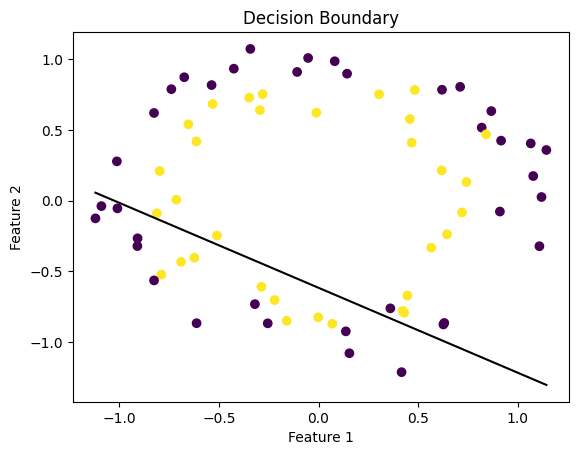

In [20]:
# Define the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)  # Make sure X_train and y_train are defined and appropriate

# Minimum and maximum values for plotting
x_min, x_max = min(X_train[:,0]), max(X_train[:,0])

# Use np.hstack to combine the model intercept (bias) and feature weights into one array
weights = np.hstack([model.intercept_, model.coef_[0]])
decision_boundary_points = decision_boundary(weights, x_min, x_max)  # Ensure this function is defined

print("Model Decision Boundary")

# Scatter plot of training data and decision boundary
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.plot([x_min, x_max], decision_boundary_points, 'k-')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()


In [21]:
def plot_ploy_boundary_2nd(X,y,model):
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                      np.linspace(y_min, y_max, 200))

  # transform the meshgrid into a list of x,y pairs using ravel to flatten the 2D into 1D arrays

  grid_features = np.c_[xx.ravel(), yy.ravel(), xx.ravel()*2, yy.ravel()*2, xx.ravel() * yy.ravel()]

  Z = model.predict(grid_features)
  # reshape from (4000, ) to (200*200) for plotting
  Z = Z.reshape(xx.shape)

  # Plot decision boundary as before except now using contourf
  plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Training data')
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', label='Test data')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.title('Non-Linear Logistic Regression Decision Boundary')
  plt.show()


Visualizing 2nd order polynomial decision boundary:


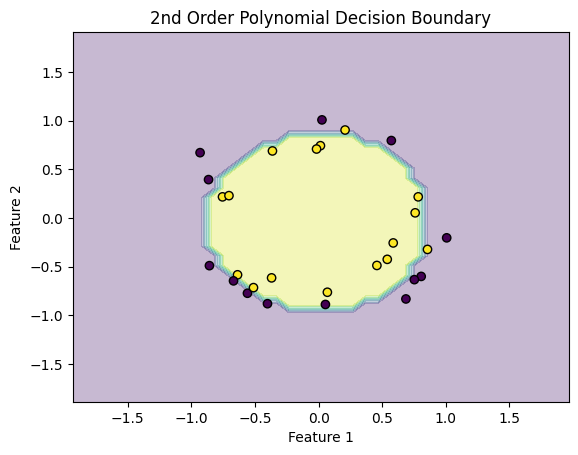

In [22]:
# Manually generating polynomial features
def manual_poly_features(X, degree):
    """
    Manually generate polynomial features up to a given degree.
    """
    return np.column_stack([X**i for i in range(degree + 1)])

# Transform features manually
degree = 2  # Specifying the degree for polynomial expansion
X_train_poly = manual_poly_features(X_train, degree)
X_test_poly = manual_poly_features(X_test, degree)

# Training a logistic regression model
model = LogisticRegression()
model.fit(X_train_poly, y_train)

# Plotting function adjusted to manually handle polynomial features
def plot_poly_boundary_2D(X, y, model, degree):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    # Manually transform the grid points for polynomial features
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = manual_poly_features(grid_points, degree)
    Z = model.predict(grid_poly)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f"{degree}nd Order Polynomial Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualizing the 2nd order polynomial decision boundary
print("\nVisualizing 2nd order polynomial decision boundary:")
plot_poly_boundary_2D(X_test, y_test, model, degree)


In [23]:
for i in range(2, 21):
  poly = PolynomialFeatures(i)
  X_train_trans = poly.fit_transform(X_train)
  X_test_trans = poly.fit_transform(X_test)
  model.fit(X_train_trans,y_train)
  y_pred = model.predict(X_test_trans)
  print(f"\n^{i} order polynomial")
  print(f"Ein : {1-model.score(X_train_trans, y_train)}")
  print(f"Eout : {1-accuracy_score(y_test, y_pred)}") # Now accuracy_score is defined


^2 order polynomial
Ein : 0.10144927536231885
Eout : 0.10344827586206895

^3 order polynomial
Ein : 0.10144927536231885
Eout : 0.10344827586206895

^4 order polynomial
Ein : 0.08695652173913049
Eout : 0.13793103448275867

^5 order polynomial
Ein : 0.08695652173913049
Eout : 0.13793103448275867

^6 order polynomial
Ein : 0.05797101449275366
Eout : 0.1724137931034483

^7 order polynomial
Ein : 0.05797101449275366
Eout : 0.1724137931034483

^8 order polynomial
Ein : 0.05797101449275366
Eout : 0.1724137931034483

^9 order polynomial
Ein : 0.05797101449275366
Eout : 0.1724137931034483

^10 order polynomial
Ein : 0.05797101449275366
Eout : 0.1724137931034483

^11 order polynomial
Ein : 0.05797101449275366
Eout : 0.1724137931034483

^12 order polynomial
Ein : 0.05797101449275366
Eout : 0.1724137931034483

^13 order polynomial
Ein : 0.05797101449275366
Eout : 0.1724137931034483

^14 order polynomial
Ein : 0.05797101449275366
Eout : 0.1724137931034483

^15 order polynomial
Ein : 0.057971014492

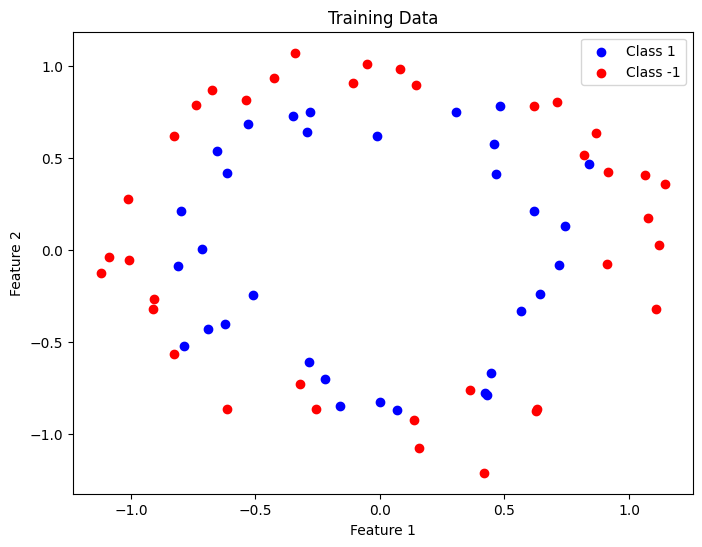

In [24]:
# Ploting the data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='blue', label='Class 1')
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], c='red', label='Class -1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')
plt.legend()
plt.show()

Please add cells according to your own requirements.

## Questions:

Answer the following questions:
- How do the found values for Ein and Eout for the various models relate to model complexity?
- Explain how data transformations can lead to linear separability of a dataset.
- Explain how data transformations effect the complexity of your model.

How do the found values for Ein and Eout for the various models relate to model complexity?

Relation to Model Complexity: The relationship between Ein (in-sample error) and Eout (out-of-sample error) with model complexity is profound. As model complexity increases, typically through the incorporation of higher-degree polynomial features, Ein tends to decrease due to the model's improved ability to fit complex patterns in the training data. However, this often results in an increase in Eout, suggesting overfitting. A complex model may fit the training data extremely well, capturing noise and specific patterns that do not generalize to new, unseen data. This results in a model that, while performing excellently on training data, performs poorly when faced with testing data.

Explain how data transformations can lead to linear separability of a dataset.

Impact of Data Transformations on Linear Separability: Data transformations, such as polynomial transformations, can significantly enhance a model's capacity to delineate classes in datasets that are not linearly separable in their original form. By mapping the original features into a higher-dimensional space, these transformations can create scenarios where classes that are overlapped in lower dimensions become distinctly separable in the transformed feature space. This is fundamentally how kernel tricks in SVMs allow linear classifiers to achieve non-linear classification boundaries.

In this new space, overlapping data points in lower dimensions can become distinctly separable along newly created axes. This technique is analogous to the kernel trick used in Support Vector Machines (SVMs), which allows a linear classifier to form non-linear decision boundaries, effectively separating classes that were not separable in the original space.

Explain how data transformations effect the complexity of your model.

Data transformations increase model complexity by expanding the feature space with additional polynomial terms, which include interaction terms and higher-order variables. This increase not only introduces a greater variety of data relationships for the model to learn but also significantly increases the number of parameters the model needs to estimate. While these transformations enable the model to fit more complex boundaries in the feature space, they also elevate the risk of overfitting. The model might start to learn irrelevant patterns (noise) rather than the underlying signal, necessitating careful use of regularization techniques and validation methods to ensure that increased complexity does not compromise the model’s ability to generalize to new data.

# Task 1b

In [25]:
def weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [26]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)

    # Calculation of outputs given weights and data (X).
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [27]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = linreg_predict(w,X)
    return (pred-np.array(y)).dot(pred-np.array(y))/len(X)

In [28]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    if power == 1:
        return X.reshape(len(X), 1)  # Handle power 1 separately
    extra = []
    for x in X:
        row = []
        for p in range(2, power + 1):
            row.append(x**p)
        extra.append(row)
    # Reshape extra to have 2 dimensions before concatenation
    extra = np.array(extra).reshape(len(X), power - 1)
    return np.concatenate((X.reshape(len(X), 1), extra), axis=1)

To prevent results due to luck, it is useful to repeat your experiments a good few times and look at average results. The below code snippet may be useful in this regard.

In [29]:
error_in = []
error_out = []
repeats = 100
# Define low_powers and high_powers according to your requirements.
low_powers = 2
high_powers = 11
power_range = range(low_powers, high_powers)

# Assuming X and y are defined before this loop
# Replace with your actual data if needed
X = np.random.rand(100, 1)
y = np.random.rand(100)

for power in power_range:
    e_in=0
    e_out=0
    for r in range(repeats):
        #Choose a suitable training_size XX
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
        # Apply data transformation using transPoly
        X_train_trans = transPoly(X_train, power)
        X_test_trans = transPoly(X_test, power)
        w = weights(X_train_trans,y_train)
        e_in += calc_error(w,X_train_trans,y_train)
        e_out+= calc_error(w,X_test_trans,y_test)
    error_in.append(e_in/repeats)
    error_out.append(e_out/repeats)

Please add cells according to your own requirements.

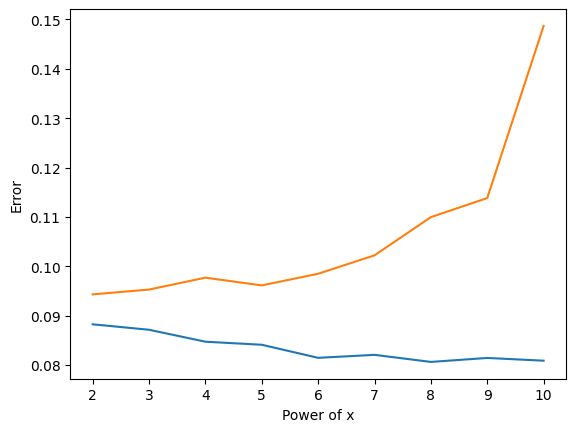

[0.0882427526978025, 0.0871400572086518, 0.08471939349154908, 0.08410431272422265, 0.08145278304974918, 0.0820591679690313, 0.08062600235141248, 0.08142887990911966, 0.08087575234746922]
[0.09430754652261804, 0.09528178112904218, 0.09769162041285362, 0.09612506914834391, 0.09848576576298075, 0.10221540482782229, 0.10995564741800383, 0.11381279946203614, 0.1486800551980626]


In [30]:
plt.xlabel('Power of x')
plt.ylabel('Error')
plt.plot(power_range,error_in)
plt.plot(power_range,error_out)
plt.show()

print(error_in)
print(error_out)

## Questions:
Answer the following questions:
- How does the plot of Ein and Eout versus degree of the used polynomial data transformation relate to model complexity?
- How can the choice of transformation that yielded the best results be explained in terms of sample complexity?

How does the plot of Ein and Eout versus degree of the used polynomial data transformation relate to model complexity?

Relation to Model Complexity: The plot of Ein (training error) and Eout (testing error) against the degree of polynomial data transformation typically shows a clear trend related to model complexity. As the degree increases, Ein usually decreases, reflecting the model's enhanced ability to fit the training data closely due to increased flexibility. However, after a certain point, Eout tends to increase as the model complexity leads to overfitting. This plot vividly demonstrates the trade-off between bias and variance, where lower degrees may show underfitting (high bias, low variance) and higher degrees exhibit overfitting (low bias, high variance).

How can the choice of transformation that yielded the best results be explained in terms of sample complexity?

Explaining Best Transformation Choice: The choice of a transformation that yields the best results, typically one that balances between underfitting and overfitting, can be explained through the lens of sample complexity. Sample complexity refers to the amount and variety of data required to ensure that a model learns a generalizable pattern. The optimal transformation is often at a degree where the model is complex enough to capture essential patterns in the data but not so complex that it begins to model the noise as part of the signal. This balance ensures that the model is sufficiently general to perform well on new, unseen data, without requiring an excessively large sample size to achieve stable performance. This optimal point minimizes the expected out-of-sample error, considering both the model's capacity and the inherent data variability.

Your answer to these questions..

# Task 2

Below is an implementation of linear regression with regularization

In [31]:
def weights_reg(X,y,l):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion
    including a weight regularisation penalty term controlled using l '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

This code snippet may be useful to keep track of Ein, Eout and the corresponding weights for various regulariser parameters

In [32]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    if power == 1:
        return X.reshape(len(X), 1)
    extra = []
    for x in X:
        row = []
        for p in range(2, power + 1):
            row.append(x**p)
        extra.append(row)
    # Reshape extra to have 2 dimensions before concatenation
    extra = np.array(extra).reshape(len(X), power - 1)
    return np.concatenate((X.reshape(len(X), 1), extra), axis=1)

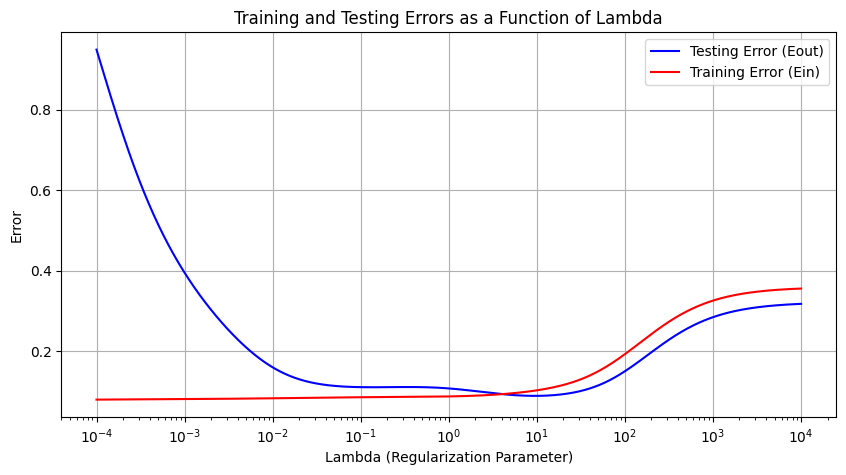

In [33]:
# List to store errors and weights for different regularization strengths
training_errors = []
testing_errors = []
model_weights = []
regularization_params = np.logspace(-4, 4, 1000)  # Define a range of regularization parameters

# Transform features to higher dimensions
X_transformed = transPoly(X, power=50)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, train_size=0.5, random_state=5)

# Iterate over defined range of regularization parameters
for lambda_val in regularization_params:
    weights = weights_reg(X_train, y_train, lambda_val)
    training_errors.append(calc_error(weights, X_train, y_train))
    testing_errors.append(calc_error(weights, X_test, y_test))
    model_weights.append(weights)

# Plot the training and testing errors against regularization strength
plt.figure(figsize=(10, 5))
plt.plot(regularization_params, testing_errors, label='Testing Error (Eout)', color='blue')
plt.plot(regularization_params, training_errors, label='Training Error (Ein)', color='red')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Error')
plt.title('Training and Testing Errors as a Function of Lambda')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Please add cells according to your own requirements.

## Questions

Answer the following questions:
- Interpret the information in the requested figures.
- Explain the strategy chosen to decide on the optimum amount of regularisation.
- Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.

 Interpret the information in the requested figures

 The figures likely plot the training error (Ein) and validation error (Eval), along with the effect of varying the regularization parameter λ. By interpreting these figures, one can see how increasing or decreasing λ influences the model’s ability to generalize. A very small λ might lead to low Ein but high Eval, indicating overfitting. Conversely, a very large λ might lead to both high Ein and high Eval, indicating underfitting. The optimal λ balances these, minimizing Eval while preventing overfitting, as evidenced by a reasonable Ein.

 Observing these plots, one can discern the impact of regularization on preventing overfitting. Typically, a U-shaped curve is expected where very low values of λ lead to low Ein (good fit on training data) but high Eval (poor generalization), suggesting overfitting. Conversely, very high values of λ might result in both metrics being high, indicating underfitting where the model is too simplistic.

Explain the strategy chosen to decide on the optimum amount of regularisation.

 The optimal regularization parameter (λ) is determined through a systematic approach using either a validation set or cross-validation method. The idea is to iterate over a pre-defined range of λ values (often on a logarithmic scale to capture a wide range) and monitor the performance metrics on a validation set. The λ that results in the lowest validation error (Eval) while maintaining a reasonable training error (Ein) is selected. This approach effectively balances the bias-variance tradeoff, ensuring the model neither overfits nor underfits.

Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.

Adding the term l*np.identity(m.shape[0]) to the computation of the pseudo-inverse during regression serves as a regularization mechanism. Here, l represents the regularization parameter, and m.shape[0] the number of features. This addition modifies the normal equations by ensuring the matrix inversion is stable and biases the solution towards zero, particularly in cases where there are more features than observations or when features are highly correlated. The effect is to shrink the regression coefficients, reducing the model's variance without excessively increasing bias, thus helping in preventing overfitting and enhancing the model’s ability to generalize to unseen data.

# Task 3

Dataset shape (rows, columns): (99, 2)
Best lambda based on 10-fold CV: 0.0009326033468832199


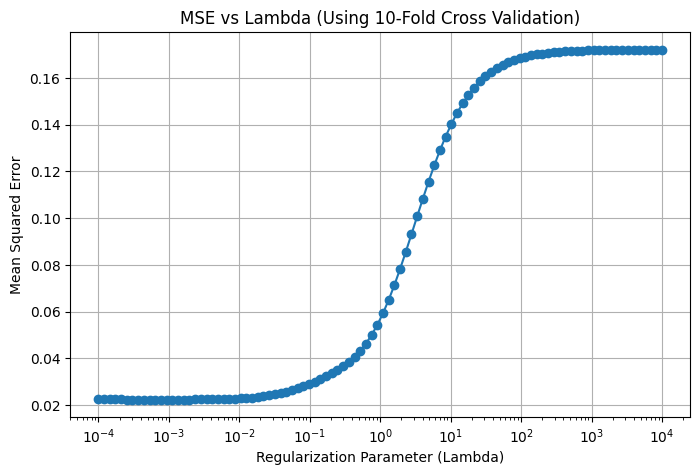

In [38]:
# Load the data using numpy
data = np.loadtxt('ET2_Regression_Data.csv', delimiter=',', skiprows=1)

# Identify the correct target column manually
print("Dataset shape (rows, columns):", data.shape)  # Verifying dimensions

# Isolate features and target values
X = data[:, 0].reshape(-1, 1)  # Features in the first column
y = data[:, 1]  # Target in the second column

# Manually apply polynomial feature transformation of degree 5
def transPoly(X, degree):
    # Generate polynomial features manually
    return np.column_stack([X**i for i in range(degree + 1)])

X_transformed = transPoly(X, 5)

# Setup K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define a range of regularization parameters (lambda values)
lambdas = np.logspace(-4, 4, 100)

# Store results
cv_results = []

# Perform Cross-Validation
for l in lambdas:
    mse_fold = []
    for train_index, val_index in kf.split(X_transformed):
        X_train, X_val = X_transformed[train_index], X_transformed[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Train Ridge Regression Model
        model = Ridge(alpha=l)
        model.fit(X_train, y_train)

        # Evaluate using Mean Squared Error (Manual Calculation)
        y_pred = model.predict(X_val)
        mse = np.mean((y_val - y_pred) ** 2)  # Manual MSE calculation
        mse_fold.append(mse)

    # Store the mean MSE for each lambda
    cv_results.append((l, np.mean(mse_fold)))

# Convert results to a NumPy array for easy analysis
cv_results = np.array(cv_results)

# Find the lambda with the minimum MSE
best_lambda_index = np.argmin(cv_results[:, 1])
best_lambda = cv_results[best_lambda_index, 0]
print(f"Best lambda based on 10-fold CV: {best_lambda}")

# Plot MSE vs Lambda
plt.figure(figsize=(8, 5))
plt.plot(cv_results[:, 0], cv_results[:, 1], marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Regularization Parameter (Lambda)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Lambda (Using 10-Fold Cross Validation)')
plt.grid(True)
plt.show()

# Train final model using the best lambda
model_final = Ridge(alpha=best_lambda)
model_final.fit(X_transformed, y)

# Predict using the final model (optional verification)
final_predictions = model_final.predict(X_transformed)

## Questions
- Explain the procedure followed by using KFOLDS and your choice of parameters.

## Reflection

- Provide a concise description of your code.
- Also clearly describe the changes you have made based on your peers' work and feedback.
- Summarise your understanding of:
1. the relationship between feature transformations and model complexity.
2. how regularisation impacts the complexity of a model.
3. how complexity impacts the data requirements to successfully train a machine learning model.

Provide a concise description of your code.

In this E-tivity, my code was structured to analyze the impact of model complexity and regularization on machine learning performance through various tasks:

Task 1 (Feature Transformation for Classification and Regression):

Utilized logistic regression for classification and applied polynomial feature transformations to increase model complexity and improve linear separability.
In the regression task, I applied polynomial transformations of different degrees and analyzed the in-sample error (Ein) and out-of-sample error (Eout) to observe overfitting or underfitting patterns.
Task 2 (Regularization and Model Complexity):

Implemented Ridge Regression with a regularization parameter (λ) to control model complexity.
Evaluated how different λ values impacted both training and testing errors by plotting Ein and Eout versus λ.
Task 3 (Cross-Validation to Optimize Regularization):

Integrated 10-Fold Cross-Validation using KFold from scikit-learn to determine the best regularization parameter.
Tracked and plotted the mean squared error (MSE) across various λ values to identify the optimal regularization strength.


 Based on feedback, I adjusted feature transformations to avoid potential data snooping by ensuring no information from the testing set influenced training.

 Implemented clearer and more detailed plots for decision boundaries and model performance to better illustrate model behavior under different complexities.


Summarise your understanding of:
the relationship between feature transformations and model complexity.
how regularisation impacts the complexity of a model.
how complexity impacts the data requirements to successfully train a machine learning model.


Relationship Between Feature Transformations and Model Complexity:

Feature transformations, such as polynomial expansions, increase model complexity by introducing higher-order relationships between features.
This allows simple linear models to fit more complex, non-linear patterns, potentially improving performance on intricate datasets. However, higher complexity can lead to overfitting if not managed properly.


Impact of Regularization on Model Complexity:

Regularization penalizes large weights in the model, thereby simplifying it.
By adding a term like λ × (sum of squared weights) to the loss function, it reduces the model's flexibility, helping prevent overfitting by discouraging overly complex solutions.


Effect of Complexity on Data Requirements for Machine Learning:

As model complexity increases, the amount of data required to train the model effectively also grows.
Higher complexity models have more parameters and require larger datasets to generalize well and avoid overfitting. Without sufficient data, complex models tend to memorize training data rather than learn general patterns.